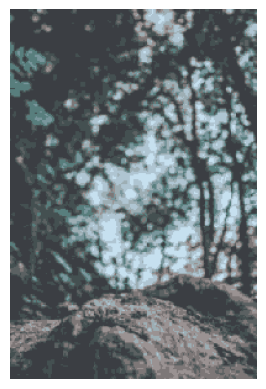

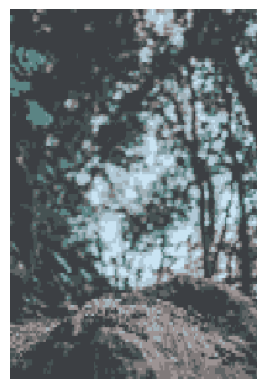

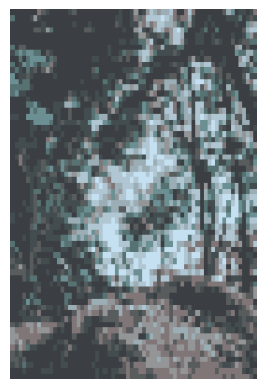

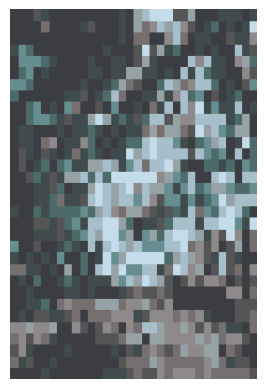

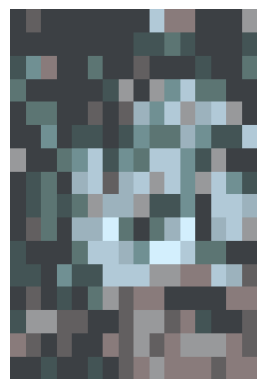

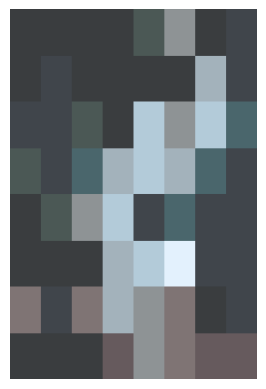

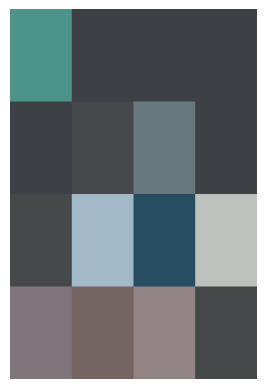

<ipython-input-3-6548bfebc766>:44: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0).fit(imgC).labels_
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


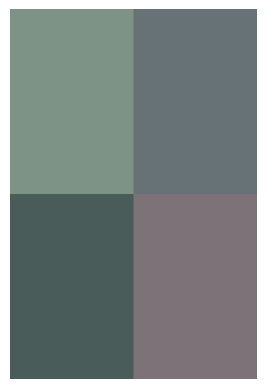

In [3]:
import skimage 
from sklearn.cluster import KMeans
from numpy import linalg as LA
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
import urllib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#img = cv2.imread("")
req = urllib.request.urlopen('https://picsum.photos/id/567/200/300')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'


def colorClustering(idx, img, k):
    clusterValues = []
    for _ in range(0, k):
        clusterValues.append([])
    
    for r in range(0, idx.shape[0]):
        for c in range(0, idx.shape[1]):
            clusterValues[idx[r][c]].append(img[r][c])

    imgC = np.copy(img)

    clusterAverages = []
    for i in range(0, k):
        clusterAverages.append(np.average(clusterValues[i], axis=0))
    
    for r in range(0, idx.shape[0]):
        for c in range(0, idx.shape[1]):
            imgC[r][c] = clusterAverages[idx[r][c]]
            
    return imgC

def segmentImgClrRGB(img, k):
    imgC = np.copy(img)
    h = img.shape[0]
    w = img.shape[1]
    imgC.shape = (img.shape[0] * img.shape[1], 3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(imgC).labels_
    kmeans.shape = (h, w)
    return kmeans

def kMeansImage(image, k):
    idx = segmentImgClrRGB(image, k)
    return colorClustering(idx, image, k)

def pixelate(img, w, h):
    height, width = img.shape[:2]
    temp = cv2.resize(img, (w, h), interpolation=cv2.INTER_LINEAR)
    return cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)

for i in range(8,0,-1):
  
  img16 =(pixelate(img, pow(2,i), pow(2,i))) 
  img17= kMeansImage(img16,10)
  im = plt.imshow(img17)
  plt.axis('off')
  plt.grid(False)
  plt.show()


